<a href="https://colab.research.google.com/github/adityapentyala/FM-Assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np


In [19]:
#Corporate tax rate from https://www.incometax.gov.in/iec/foportal/help/company/return-applicable#taxslabs
tax = 0.3 #assuming the companies come under the "any other domestic company" tax slab

#risk-free rate from https://epwrfits.in/Display_TreeViewSecurity.aspx
rfr = 0.071361

#HPCL stock price as of 09-04-24, as listed on https://www.nseindia.com/get-quotes/equity?symbol=HINDPETRO
HPCL_stock_price = 458.85

#no of shares (in crores), HPCL, as listed on https://ticker.finology.in/company/HINDPETRO
HPCL_n_shares_cr = 141.85

In [20]:
#Defining a class which stores all relavent information of each firm
class Company:
    def __init__(self,de_ratio,intercept,name,beta_levered=None):
        self.beta_levered=beta_levered
        self.de_ratio=de_ratio
        self.intercept=intercept
        self.beta_unlevered: float = None
        self.name=name

In [21]:
#Function to unlever financial leverage from beta
def unlevering(beta_levered,de_ratio,tax):
  return beta_levered/(1+(de_ratio*(1-tax)))

In [22]:
#Function to relever the beta
def relevering(beta_unlevered,de_ratio,tax):
    return beta_unlevered*(1+(de_ratio*(1-tax)))

In [23]:
#Funtion calculating cost of equity
def costofequity(rf,market_rp,beta_relevered):
    return rf+beta_relevered*(market_rp)

In [24]:
#Function to calculate WACC
def WACC_calc(cost_of_debt,tax,Wb,cost_of_equity,Ws):
    return (cost_of_debt*(1-tax)*Wb)+(cost_of_equity*Ws)

In [25]:
def plot_graph(comparable_companies: list[Company], target_company: Company):
    plt.figure()
    comparable_intercepts = []
    print(target_company.name, ":", target_company.beta_levered)
    for company in comparable_companies:
        print(company.name, ":", company.beta_levered)
        x = np.linspace(0, 10, 101)
        y = company.intercept + company.beta_levered * x
        comparable_intercepts.append(company.intercept)
        plt.plot(x, y, label =company.name)
    target_y = sum(comparable_intercepts)/len(comparable_intercepts) + target_company.beta_levered * x
    plt.plot(x, target_y, label=target_company.name)
    plt.xlabel("Market interest rate")
    plt.ylabel("Firm's interest rate")
    plt.legend()
    plt.show()

In [26]:
#calculating market values of debt & equity of HPCL
market_value_debt_HPCL_cr = 64517.22 #pulled from the internet
market_value_equity_HPCL_cr = HPCL_stock_price * HPCL_n_shares_cr #stock price * no of shares outstanding

In [27]:
#D-E Ratios, sourced from ____
HPCL_de = 64517.22/65087.8725#2.33
BPCL_de = 1.14
MRPL_de = 1.69
IOCL_de = 1
CPCL_de = 0.66

In [28]:
#Defining Company attributes
HPCL=Company(HPCL_de,-0.0005,"HPCL")
BPCL=Company(BPCL_de,-0.0022,"BPCL",1.2529)
MRPL=Company(MRPL_de,0.0082,"MRPL",1.3580)
IOCL=Company(IOCL_de,0.0021,"IOCL",1.0324)
CPCL=Company(CPCL_de,0.0118,"CPCL",1.3004)

In [29]:
#Step 1: Unlevering the Beta values
BPCL.beta_unlevered=unlevering(BPCL.beta_levered,BPCL.de_ratio,tax)
MRPL.beta_unlevered=unlevering(MRPL.beta_levered,MRPL.de_ratio,tax)
IOCL.beta_unlevered=unlevering(IOCL.beta_levered,IOCL.de_ratio,tax)
CPCL.beta_unlevered=unlevering(CPCL.beta_levered,CPCL.de_ratio,tax)

In [30]:
#Step 2:Calculating the average of the unlevered betas
betas_unlevered=[BPCL.beta_unlevered,MRPL.beta_unlevered,IOCL.beta_unlevered,CPCL.beta_unlevered]
mean_beta_unlevered=sum(betas_unlevered)/len(betas_unlevered)

In [31]:
#Step 3:Relevering the mean unlevered beta with respect to HPCL
HPCL_relevered=relevering(mean_beta_unlevered,HPCL.de_ratio,tax)
HPCL.beta_levered=HPCL_relevered

In [32]:
#Step 4:Calcutaing cost of equity and debt
cost_of_equity=costofequity(rfr,0.0143,HPCL_relevered)
cost_of_debt=0.14  #The interest coverage ratio of the firm was -4.52 which equated to a 14% interest rate on debt

In [33]:
#Step 5:Calculating the weightage of debt and equity
Ws=1/(1+HPCL.de_ratio)
Wb=1-Ws

In [34]:
#Step 6:Calculating the WACC for the firm
WACC=WACC_calc(cost_of_debt,tax,Wb,cost_of_equity,Ws)
print("The value of WACC for HPCL is ", WACC)

print("HPCL's market value of equity is: ", market_value_equity_HPCL_cr, "(in crores) as on 09-04-24")
print("HPCL's market value of debt is: ", market_value_debt_HPCL_cr, "(in crores)")

The value of WACC for HPCL is  0.0931846198044918
HPCL's market value of equity is:  65087.8725 (in crores)
HPCL's market value of debt is:  64517.22 (in crores)


HPCL : 1.1923397240351448
BPCL : 1.2529
MRPL : 1.358
IOCL : 1.0324
CPCL : 1.3004


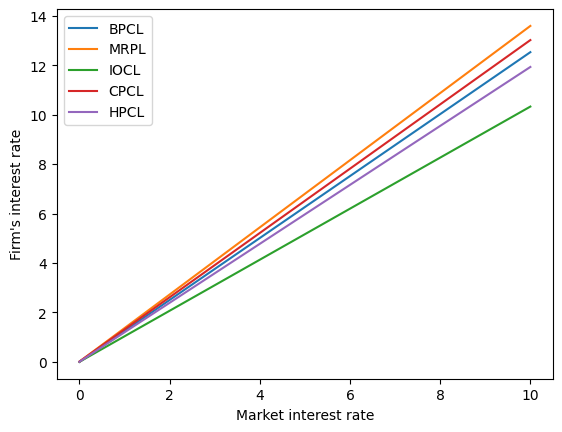

In [35]:
plot_graph([BPCL, MRPL, IOCL, CPCL], HPCL)